# Download RGI glacier shapefiles and plot those that are in our RoI

In [1]:
import geopandas as gpd
import os

In [2]:
data_dir = "rgi_data"

In [3]:
!mkdir -p $data_dir
%cd $data_dir
if not os.path.exists('01_rgi60_Alaska.zip'):
    !wget -O 01_rgi60_Alaska.zip https://www.glims.org/RGI/rgi60_files/01_rgi60_Alaska.zip
    !unzip 01_rgi60_Alaska.zip
%cd ..

/home/jovyan/glacier-velocity-from-sar/import_data/import_glacier_shapefiles_rgi/rgi_data
--2021-04-27 18:02:10--  https://www.glims.org/RGI/rgi60_files/01_rgi60_Alaska.zip
Resolving www.glims.org (www.glims.org)... 128.138.135.43
Connecting to www.glims.org (www.glims.org)|128.138.135.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82224693 (78M) [application/zip]
Saving to: ‘01_rgi60_Alaska.zip’

01_rgi60_Alaska.zip 100%[===================>]  78.42M  65.7MB/s    in 1.2s    

2021-04-27 18:02:11 (65.7 MB/s) - ‘01_rgi60_Alaska.zip’ saved [82224693/82224693]

Archive:  01_rgi60_Alaska.zip
  inflating: 01_rgi60_Alaska.dbf     
  inflating: 01_rgi60_Alaska.prj     
  inflating: 01_rgi60_Alaska.shp     
  inflating: 01_rgi60_Alaska.shx     
  inflating: 01_rgi60_Alaska_hypso.csv  
/home/jovyan/glacier-velocity-from-sar/import_data/import_glacier_shapefiles_rgi


In [5]:
# rgi60_gdf = gpd.read_file("shapefiles/02_rgi60_WesternCanadaUS.shp")
rgi60_gdf = gpd.read_file(f"{data_dir}/01_rgi60_Alaska.shp")
muldrow_box = gpd.read_file('muldrow.geojson')

<AxesSubplot:>

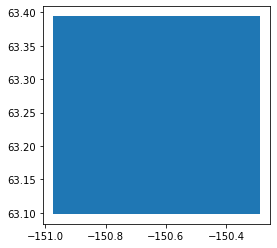

In [6]:
muldrow_box.plot()

In [7]:
muldrow_box.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
rgi60_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

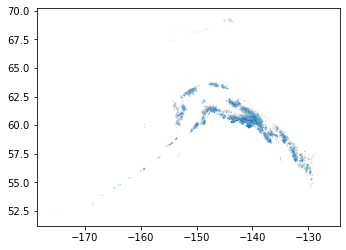

In [9]:
rgi60_gdf.plot()

In [10]:
# wa_rgi60_gdf = rgi60_gdf[rgi60_gdf.within(rainier_box)].copy()
ak_rgi60_gdf = rgi60_gdf[rgi60_gdf.intersects(muldrow_box.loc[0, 'geometry'])]

<AxesSubplot:>

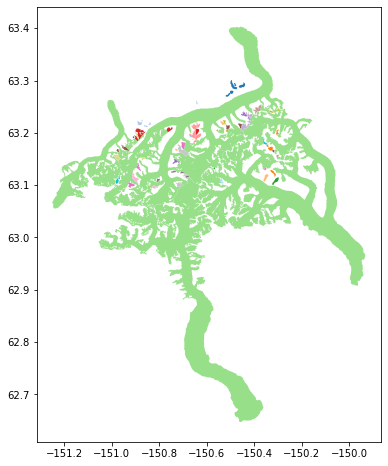

In [12]:
ak_rgi60_gdf.plot(figsize=(8,8),cmap='tab20')

In [ ]:
wa_rgi60_gdf

In [ ]:
named_glaciers = wa_rgi60_gdf[wa_rgi60_gdf['Name'] != 'WA']

In [ ]:
named_glaciers.columns

In [ ]:
named_glaciers.to_file("rgi_data/rainier_glaciers.geojson", driver='GeoJSON')

In [ ]:
named_glaciers[named_glaciers['Name'] == 'Carbon Glacier WA']

In [ ]:
south_facing_glaciers = named_glaciers[(named_glaciers['Aspect'] > 90) & (named_glaciers['Aspect'] < 270)]
south_facing_glaciers.plot()

In [ ]:
rainier_box.columns

In [ ]:
rgi60_gdf.columns

In [ ]:
wa_rgi60_gdf[wa_rgi60_gdf['Name'] == 'Kautz Glacier WA'].plot()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
glacier = wa_rgi60_gdf.iloc[[0]]
glacier['Name'].item()

## Plot all named glaciers so we can see their shapes in detail

In [ ]:
cols = 5
rows = len(named_glaciers) // cols 

f,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,13))
k=0
for j in range(rows):
    for i in range(cols):
        glacier = named_glaciers.iloc[[k]]
        glacier.plot(ax=ax[i,j])
        title = glacier['Name'].item()
        ax[i,j].set_title(title)
        k = k + 1
plt.tight_layout()

In [ ]:
#sorted(named_glaciers['Name'])

In [ ]:
#sorted(set(named_glaciers['Name'])) # Excluding "WA"